In [1]:
%matplotlib inline
import random
import pylab
from scipy.stats import gaussian_kde

In [2]:
# make a trunk with 'total_in_trunk' m&ms in it, using color/distribution
def make_trunk(colors, dist, total_in_trunk):
    total_dist = sum(dist)
    
    trunk = []
    for (color, count) in zip(colors, dist):
        num = count / total_dist * total_in_trunk
        trunk.extend([color] * int(num))
    random.shuffle(trunk)
    
    return trunk

def sample_n(trunk, n):
    sample = []
    for i in range(n):
        sample.append(trunk.pop())
    return sample

## Define distribution of M&Ms in trunks:

In [3]:

colors = ['chartreuse', 'green', 'blue', 'red', 'purple', 'pink', 'grey', 'black', 'white', 'brown']
dist1 = [20, 11, 5, 22, 3, 50, 1,  1, 12, 19]
dist2 = [20, 11, 5, 1,  3, 50, 20, 1, 20, 19]
#                   ^^         ^^     ^^


## Make two trunks:

In [4]:
trunk1 = make_trunk(colors, dist1, 1e7)
trunk2 = make_trunk(colors, dist2, 1e7)

## Count red M&Ms in trunks, compare with theory:

In [5]:
trunk1.count('red') / len(trunk1)

0.1527777763888882

In [6]:
dist1[0] / sum(dist1)

0.1388888888888889

## Small samples give us less accurate estimations than big samples

In [7]:
sample1 = sample_n(trunk1, 10)

In [8]:
sample1.count('red')

1

In [9]:
sample_n(trunk1, 100).count('red')

15

In [10]:
sample_n(trunk1, 1000).count('red')

162

## Each sample gives us a different estimation

In [11]:
sample_n(trunk1, 100).count('red')

14

In [12]:
sample_n(trunk1, 100).count('red')


16

In [13]:
sample_n(trunk1, 100).count('red')

17

## These estimations are Poisson distributed

In [14]:
red_fraction = []

In [15]:
sample = sample_n(trunk1, 100)
print('got {} red out of {}'.format(sample.count('red'), len(sample)))
f = sample.count('red') / len(sample)
red_fraction.append(f)
      

got 15 red out of 100


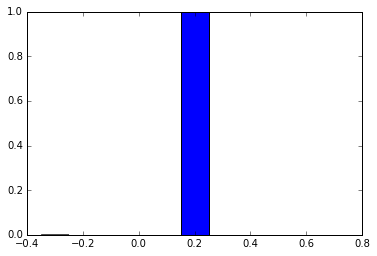

In [16]:
_ = pylab.hist(red_fraction)

## Few samples -> bad estimation

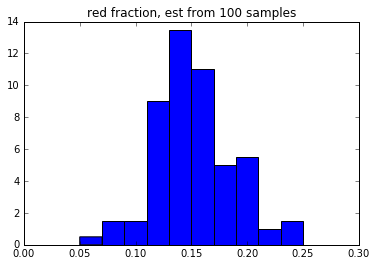

In [17]:
red_fraction_small = []
for i in range(100):
    sample = sample_n(trunk1, 100)
    f = sample.count('red') / len(sample)
    red_fraction_small.append(f)
    
_ = pylab.hist(red_fraction_small, normed=True)
pylab.title('red fraction, est from {} samples'.format(len(red_fraction_small)))
_ = pylab.axis(xmin=0, xmax=0.3)

## More samples -> better estimation

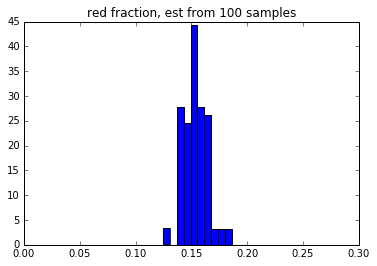

In [18]:
red_fraction_big = []
for i in range(100):
    sample = sample_n(trunk1, 1000)        # <-- from 100 to 1000
    f = sample.count('red') / len(sample)
    red_fraction_big.append(f)
    
_ = pylab.hist(red_fraction_big,normed=True)
pylab.title('red fraction, est from {} samples'.format(len(red_fraction_big)))
_ = pylab.axis(xmin=0, xmax=0.3)

## You can do Gaussian fits if you want it to look prettier --

this smooths over the binning noise.

In [19]:
g1 = gaussian_kde(red_fraction_small)
g2 = gaussian_kde(red_fraction_big)

xs = numpy.linspace(0, 0.3, 100)
pylab.plot(xs, g1(xs), label='100 samples per')
pylab.plot(xs, g2(xs), label='1000 samples per')
pylab.legend(loc='upper right')

NameError: name 'numpy' is not defined

## You can estimate the number of red M&Ms in trunk2 also:

In [ ]:
red_fraction2 = []
for i in range(1000):
    sample = sample_n(trunk2, 100)
    f = sample.count('red') / len(sample)
    red_fraction2.append(f)
    
_ = pylab.hist(red_fraction2)
pylab.title('small fractions of M&Ms cause measurement problems')

(It's harder to get good estimates for lower abundance M&Ms!)

## Let's look at white M&Ms, now.

In [ ]:
print('trunk 1 / white count:', sample_n(trunk1, 100).count('white'))
print('trunk 2 / white count:', sample_n(trunk2, 100).count('white'))

## hmm, better look at distributions...

In [ ]:
white_fraction1 = []
for i in range(1000):
    sample = sample_n(trunk1, 100)
    f = sample.count('white') / len(sample)
    white_fraction1.append(f)
    
_ = pylab.hist(white_fraction1)
pylab.axis(xmax=0.30)
pylab.title('white M&Ms in trunk1')

In [ ]:
white_fraction2 = []
for i in range(1000):
    sample = sample_n(trunk2, 100)
    f = sample.count('white') / len(sample)
    white_fraction2.append(f)
    
_ = pylab.hist(white_fraction2)
pylab.axis(xmax=0.30)
pylab.title('white M&Ms in trunk2')